In [2]:
suppressMessages(library('data.table'))
suppressMessages(library('tidyverse'))
suppressMessages(library('cowplot'))
suppressMessages(library('VisualVisium'))

In [3]:
cntmtr_tpl <- rawmatr_and_tpl("/Volumes/Backup\ Plus/10x_datasets/V1_Adult_Mouse_Brain_outs")

In [4]:
tpl <- cntmtr_tpl[['tpl']]
head(tpl)

barcode,tissue,row,col,imagerow,imagecol,umis
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
ACGCCTGACACGCGCT-1,0,0,0,63.84282,61.75045,1112
TACCGATCCAACACTT-1,0,1,1,69.96683,65.27175,1565
ATTAAAGCGGACGAGC-1,0,0,2,63.84282,68.79306,1521
GATAAGGGACGATTAG-1,0,1,3,69.96683,72.31436,2218
GTGCAAATCACCAATA-1,0,0,4,63.84282,75.83567,2302
TGTTGGCTGGCGGAAG-1,0,1,5,69.96683,79.30594,2945


In [5]:
tpl_wbands <- visium_bands(tpl)
head(tpl_wbands)

barcode,tissue,row,col,imagerow,imagecol,umis,band
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
CACATAAGGCGACCGT-1,1,1,29,69.96683,163.6132,32871,bm1
ATACGCCGATCTACCG-1,1,1,31,69.96683,170.6047,34445,bm1
ACTTATCTGATCTATA-1,1,0,32,63.84282,174.1260,24496,bm1
GTGTGAGCCGAGGTGC-1,1,1,33,69.96683,177.6474,34103,bm1
TCTGTGACTGACCGTT-1,1,3,23,82.21485,142.5364,20585,bm1
CTAGCAACTAATTTAC-1,1,2,28,76.09084,160.0919,26016,bm1


In [16]:
coord_range <- range(as.matrix(tpl_wbands[, list(imagecol, imagerow)]))

In [20]:
pbands_in <- ggplot(tpl_wbands[tissue == 1], 
       aes(x=imagecol, y=imagerow, color=band)) +
  geom_point(shape = 20, size = 1, stroke = 0.5) +
  coord_fixed(xlim = coord_range, ylim = coord_range) +
  xlab('X') + 
  ylab('Y') +
  ggtitle('bands inside of tissue') +
  theme_bw() +
  scale_colour_brewer(palette = 'Spectral')
pbands_out <- ggplot(tpl_wbands[tissue == 0], 
       aes(x=imagecol, y=imagerow, color=band)) +
  geom_point(shape = 20, size = 1, stroke = 0.5) +
  coord_fixed(xlim = coord_range, ylim = coord_range) +
  xlab('X') + 
  ylab('Y') +
  ggtitle('bands outside of tissue') +
  theme_bw() +
  scale_colour_brewer(palette = 'Spectral')

In [21]:
p <- plot_grid(pbands_in, pbands_out, nrow = 1)

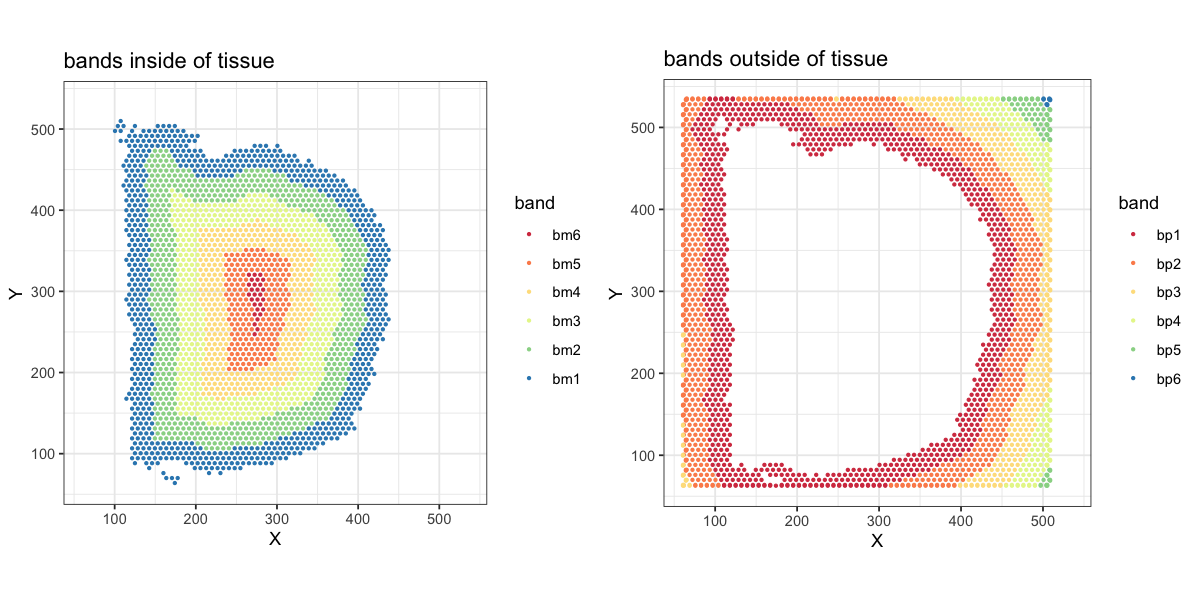

In [22]:
options(repr.plot.width=10, repr.plot.height=5)
p

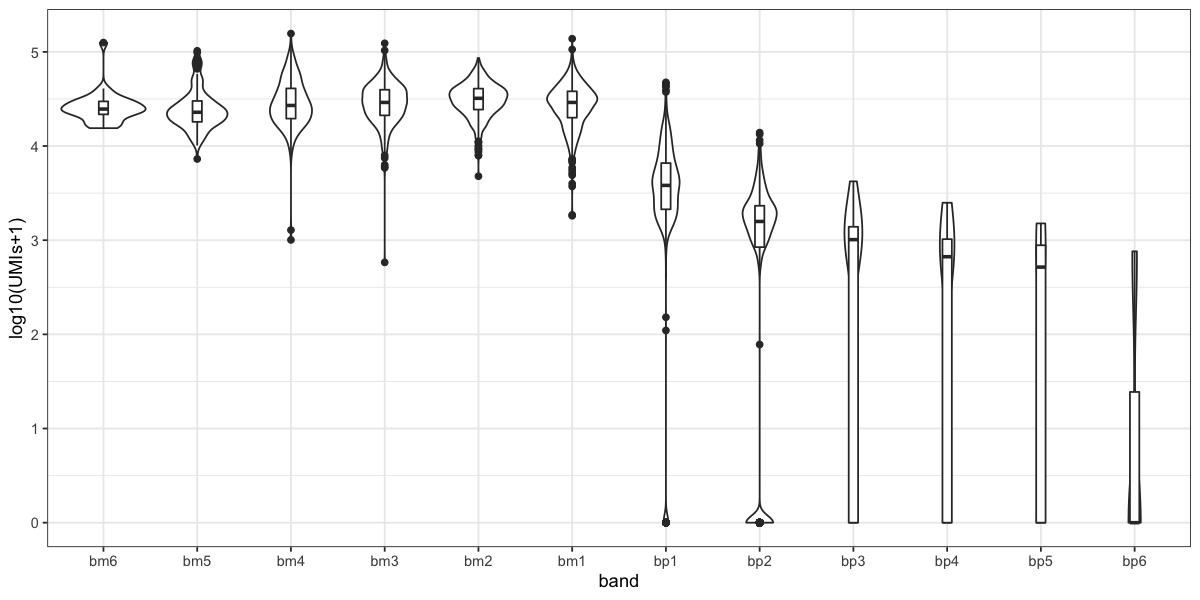

In [25]:
p <- ggplot(tpl_wbands, aes(x=band, y=log10(umis+1))) + 
  geom_violin(trim=T) +
  geom_boxplot(width=0.1) +
  theme_bw() +
  ylab('log10(UMIs+1)')
options(repr.plot.width=10, repr.plot.height=5)
p